In [3]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Problem 7
The table below provides a trainnig data set containing six observations, three predictors, and one qualitative response variable.

In [14]:
df_7 = pd.DataFrame({'X1': [0, 2, 0, 0, -1, 1], 'X2': [3, 0, 1, 1, 0, 1], 'X3': [0, 0, 3, 2, 1, 1], 'Y': ['R', 'R', 'R', 'G', 'G', 'R']})
df_7

,X1,X2,X3,Y
0,0,3,0,R
1,2,0,0,R
2,0,1,3,R
3,0,1,2,G
4,-1,0,1,G
5,1,1,1,R


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

#### a)
Complete the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [25]:
def euc_distance(col):
    x1 = col[0]
    x2 = col[1]
    x3 = col[2]
    
    print(math.sqrt((x1 - 0)**2 + (x2 - 0)**2 + (x3 - 0)**2))
    return math.sqrt((x1 - 0)**2 + (x2 - 0)**2 + (x3 - 0)**2)


df_7['euc_distance'] = df_7[['X1', 'X2', 'X3']].apply(euc_distance, axis = 1)


3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


#### b)
What is our prediction with K = 1? Why?

In [31]:
df_7[df_7['euc_distance'] == df_7['euc_distance'].min()]['Y']

4    G
Name: Y, dtype: object

Green, because its the closest euclidean distance to 0,0,0

#### c) 
What is our prediction with K = 3? Why?

In [50]:
df_7['euc_distance'].sort_values().head(3)

4    1.414214
5    1.732051
1    2.000000
Name: euc_distance, dtype: float64

In [60]:
df_7

,X1,X2,X3,Y,euc_distance
0,0,3,0,R,3.000000
1,2,0,0,R,2.000000
2,0,1,3,R,3.162278
3,0,1,2,G,2.236068
4,-1,0,1,G,1.414214
5,1,1,1,R,1.732051


See that the Y output in index locations 1, 4, and 5 are Red, Green, and Red respectively.  The prediction is Red.  

#### d)
If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small?  Why?

We would expect the best value for K to be small otherwise it will sense more variations from the Y.  

### Problem 8
This exercise relates to the College data set, which can be found in the file College.csv.  It contains a number of variables for 777 different universities and colleges in the US.  [Proceeds to list variables].

#### a)
Use the read.csv() function to read the data into Python.  Call the loaded data college.  make sure that you have the directory set to the correct location for the data

In [66]:
df_8 = pd.read_csv('data/college.csv')
df_8.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### b)
The problem seems to want to make the first unnamed column into the index.

In [67]:
df_8 = pd.read_csv('data/college.csv', index_col=0)
df_8.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### c

##### i)
Produce a numerical summary of the variables in the dataset

In [69]:
df_8.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


##### ii)
Produce a scatterplox matrix of the first ten columns or variables of the data.

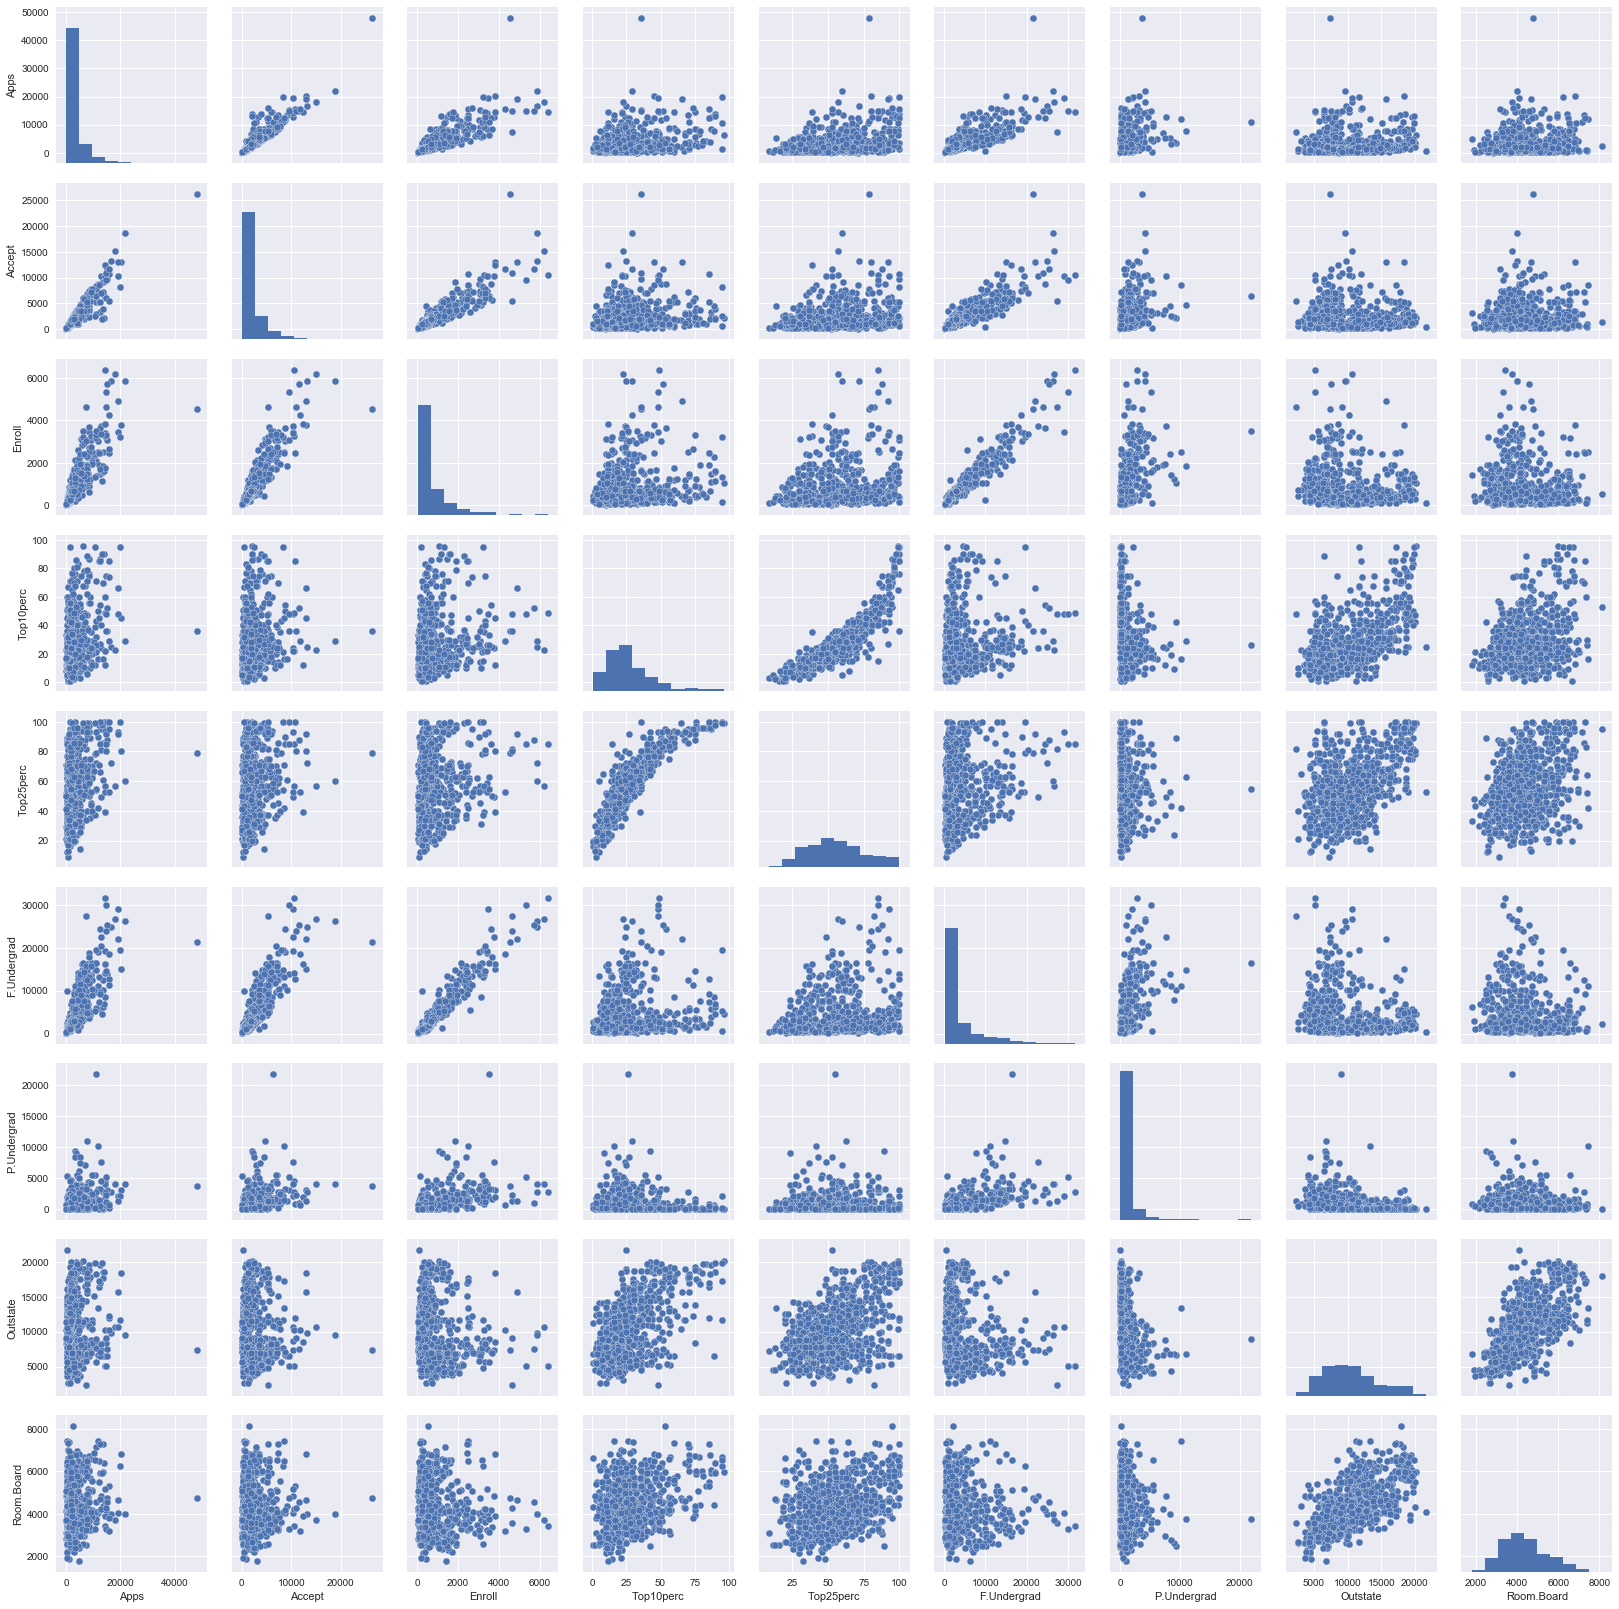

In [107]:
sns.pairplot(df_8.iloc[:,0:10])

##### iii)
Produce side-by-side boxplots of Outstate vs Private

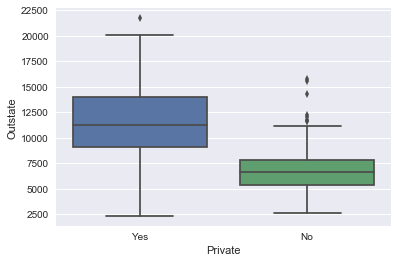

In [120]:
sns.boxplot(x = 'Private', y = 'Outstate', data = df_8)

#### iv)
Create a new qualitative variable, called Elite, by binning the Top10perc variable.  We are going to divide universities into two groups based on whether or not the proportion of studnets coming from the top 10% of their high school classes exceeds 50%.  
How many elite universities are there?  Then produce a side-by-side boxplot for Outstate vs Elite.

In [132]:
def bin_elite(col):
    if col > 50:
        return 'Yes'
    else:
        return 'No'

df_8['Elite'] = df_8['Top10perc'].apply(bin_elite)

In [142]:
df_8['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

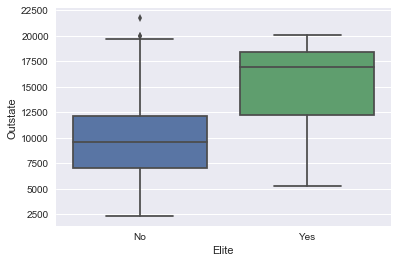

In [134]:
sns.boxplot(x = 'Elite', y = 'Outstate', data = df_8)

##### v)
Create histograms with differeing number of bins for a few of the quantitative variables.

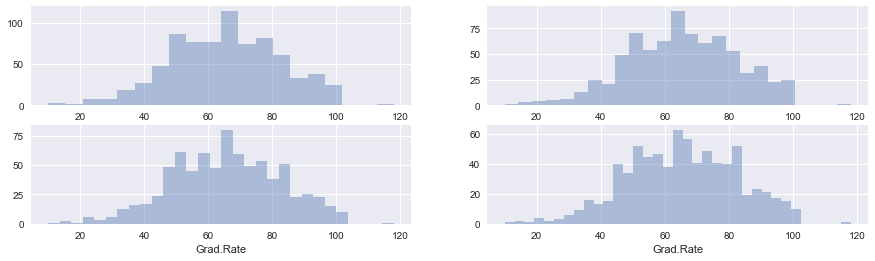

In [152]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(15,4))

sns.distplot(df_8['Grad.Rate'], bins = 20, kde = False, ax = axis1)
sns.distplot(df_8['Grad.Rate'], bins = 25, kde = False, ax = axis2)
sns.distplot(df_8['Grad.Rate'], bins = 30, kde = False, ax = axis3)
sns.distplot(df_8['Grad.Rate'], bins = 35, kde = False, ax = axis4)


##### vi)
Do more data exploration.

In [158]:
df_8.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


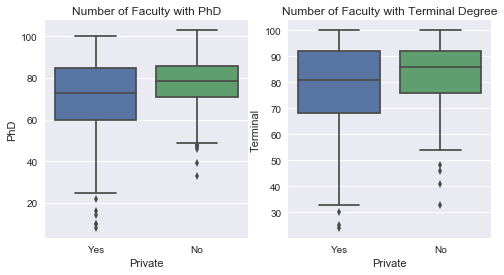

In [164]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(8,4))

sns.boxplot(x = 'Private', y = 'PhD', data = df_8, ax = axis1)
sns.boxplot(x = 'Private', y = 'Terminal', data = df_8, ax = axis2)

axis1.set_title('Number of Faculty with PhD')
axis2.set_title('Number of Faculty with Terminal Degree')

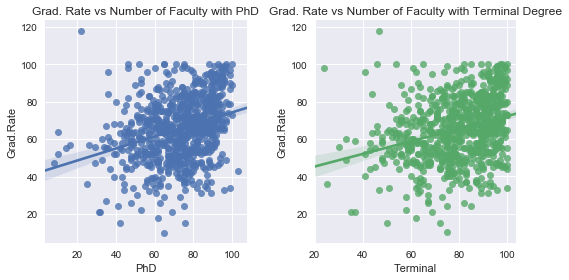

In [169]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(8,4))

sns.regplot(x = 'PhD', y = 'Grad.Rate', data = df_8, ax = axis1)
sns.regplot(x = 'Terminal', y = 'Grad.Rate', data = df_8, ax = axis2)

axis1.set_title('Grad. Rate vs Number of Faculty with PhD')
axis2.set_title('Grad. Rate vs Number of Faculty with Terminal Degree')
fig.tight_layout()

Private schools seem to have more variety of degrees in their faculty.  There also seems to be a positive trend between graduation rates and faculty with PhD or terminal degrees.  

### Problem 9
This exercise involves the Auto data set studied in the lab. Make sure to remove the missing values.

In [4]:
df_9 = pd.read_csv('data/Auto.csv')
df_9.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### a)
Which of the predictors are quantitative and which predictors are qualitative?

quantitative: mpg, cylinders, displacement, weight, acceleration, year
qualitative: origin, name

#### b)
What is the range of each quantitative predictor?

In [5]:
df_9.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### c) 
What is the mean and standard deviation for each quantitative predictor?

see answer to part b

#### d)
Now remove the 10th to 85th observations.  What is the range, mean, and std deviation of each predictor in the subset of the data that remains?

In [30]:
df_9subset = pd.concat([df_9.iloc[:11],df_9.iloc[86:]])


In [31]:
df_9subset.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,24.415528,5.378882,187.782609,2935.139752,15.691304,77.121118,1.596273
std,7.905155,1.657398,100.304316,809.138141,2.720887,3.148592,0.815572
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,2216.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.500000,2797.500000,15.500000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,3516.000000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


#### e)
Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice.  Create some plots highlighting the relationships among the predictors.  Comment on your findings.

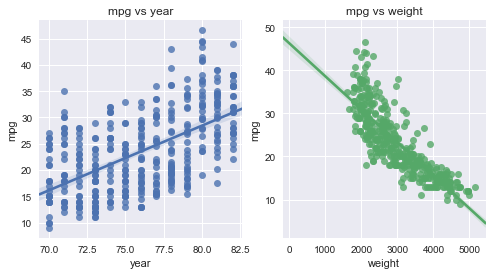

In [36]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(8,4))

sns.regplot(x = 'year', y = 'mpg', data = df_9, ax = axis1)
sns.regplot(x = 'weight', y  = 'mpg', data = df_9, ax = axis2)

axis1.set_title('mpg vs year')
axis2.set_title('mpg vs weight')

As expected, as time went on, technology got better and mpg generally got better.  I also expected weight to be inversely related to mpg, but there seems to be an asymptote at weight of 2000.  

#### f)
Suppose that we wish to predict gas milage on the basis of the other variables.  Do your plots suggest other variables might be useful in predicting mpg?  

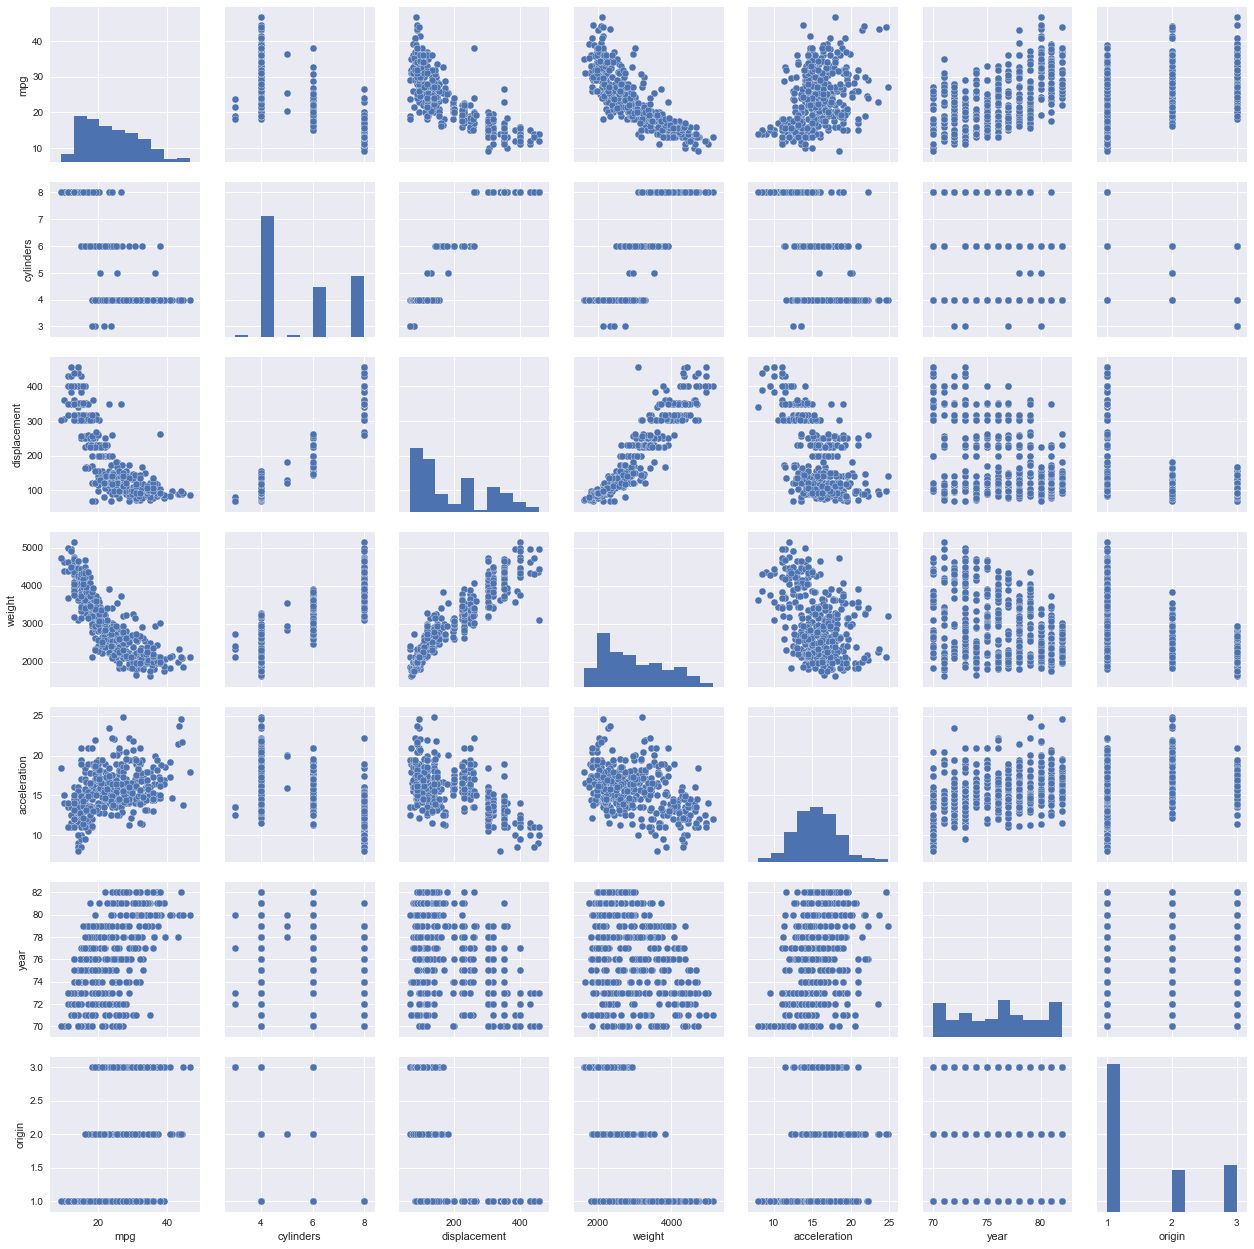

In [37]:
sns.pairplot(data = df_9)

Yes, there seems to be some relationship between mpg and the other variables.
